In [3]:
!pip install keras
!pip install tensorflow
!pip install --upgrade pip

  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
Requirement already up-to-date: pip in c:\programdata\anaconda3\lib\site-packages (19.2.1)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [9]:
# Inicializando a CNN
classifier=Sequential()

#Passo 1: Convolução
classifier.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#Passo 2: Max Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

## Segunda Camada de Convolução e Max Pooling
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Passo 3: Flatten
classifier.add(Flatten())

#Passo 4: Full Connection
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))


In [11]:
# Compilando a CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Visualizar modelo Compilado
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [32]:
# 2° Parte: Treinamento da Rede
from keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
teste_datagen=ImageDataGenerator(rescale=1./255)

In [46]:
#Base de Treino 

training_set=train_datagen.flow_from_directory('C:\\Users\\Suporte\\Desktop\\Fabricio_CNN\\dataset_pipoca\\training_set',
                                              target_size = (128,128),
                                              batch_size = 32,
                                              class_mode = 'binary')



Found 26 images belonging to 2 classes.


In [49]:
# Base de teste 
test_set = teste_datagen.flow_from_directory('C:\\Users\\Suporte\\Desktop\\Fabricio_CNN\\dataset_pipoca\\test_set',
                                             target_size = (128,128),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 6 images belonging to 2 classes.


In [51]:
# Treinar 
classifier.fit_generator(training_set,
                        steps_per_epoch=26,
                        epochs=3,
                        validation_data=test_set,
                        validation_steps=6)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
26/26 [==============================] - 37s 1s/step - loss: 0.2213 - acc: 0.8964 - val_loss: 0.1646 - val_acc: 1.0000
Epoch 2/3
26/26 [==============================] - 21s 826ms/step - loss: 0.0119 - acc: 1.0000 - val_loss: 0.1306 - val_acc: 1.0000
Epoch 3/3
26/26 [==============================] - 22s 829ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.1711 - val_acc: 0.8333


{'gato': 0, 'pipoca': 1}
Pipoca: Abrir a porta!


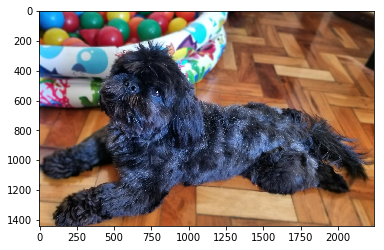

In [58]:
## 3° PARTE: Fazendo as Previsões

#PIPOCA----------

import numpy as np
from keras.preprocessing import image

image_path = 'C:\\Users\\Suporte\\Desktop\\Fabricio_CNN\\dataset_pipoca\\single_prediction\\pipoca.jpg'
import matplotlib.pyplot as plt
plt.imshow(image.load_img(image_path))

test_image = image.load_img(image_path,target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)
if result[0][0] == 1:
    prediction = 'Pipoca: Abrir a porta!'
else:
    prediction = 'Gato: Fechar a porta!'
    
print(prediction)